# Case Ifood - Data Analyst
##### https://github.com/ifood/ifood-data-business-analyst-test

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.1
NumPy                |     1.25.2
Pandas               |      2.0.3
Scikit-Learn         |      1.2.2
Seaborn              |     0.12.2

Versão do Python: 3.10.4


In [2]:
#Importar a base de dados
data = '../data/ml_project1_data.csv'
base = pd.read_csv(data)
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#Informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Descrição da parte numerica
with pd.option_context('display.float_format', '{:.2f}'.format,
                      'display.max_columns',None):
    display(base.describe())

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00   
mean   5592.16     1968.81  52247.25     0.44      0.51    49.11    303.94   
std    3246.66       11.98  25173.08     0.54      0.54    28.96    336.60   
min       0.00     1893.00   1730.00     0.00      0.00     0.00      0.00   
25%    2828.25     1959.00  35303.00     0.00      0.00    24.00     23.75   
50%    5458.50     1970.00  51381.50     0.00      0.00    49.00    173.50   
75%    8427.75     1977.00  68522.00     1.00      1.00    74.00    504.25   
max   11191.00     1996.00 666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00          1725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count       2240.00            2240.00          2240.00              2240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count       2240.00       2240.00       2240.00   2240.00        2240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count    2240.00   2240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

In [5]:
#Descrição da parte em texto
base.describe(exclude='number')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

In [6]:
#Relatorio para facilitar a análise
#from ydata_profiling import ProfileReport
#profile = ProfileReport(base)
#profile.to_file("../report/eda_ifood.html")

In [7]:
#Excluindo os valores vazios já que são apenas 2% dos dados.
base=base.dropna()

In [8]:
#Tratando a data
base["Dt_Customer"] = pd.to_datetime(base["Dt_Customer"], format="%Y-%m-%d")
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [9]:
#Verificando se o tratamento foi feito correto
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [10]:
#Descrição da coluna Dt_Customer
base['Dt_Customer'].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [11]:
#Criando uma coluna em dias para ser utilizada no modelo.
base['Days_Since_Enrolled'] = base['Dt_Customer'].max() - base['Dt_Customer']
base['Days_Since_Enrolled'] = base['Days_Since_Enrolled'].dt.days
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Days_Since_Enrolled  
0         11         1                  663  
1         11         0                  113  
2         11         0                  312  
3         11         0                  139  
4         11         0                  161  

[5 rows x 30 columns]

In [12]:
#Criando uma coluna categorica em ano
base['Years_Since_Enrolled'] = base['Days_Since_Enrolled']//365
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Days_Since_Enrolled  Years_Since_Enrolled  
0                  663                     1  
1                  113                     0  
2                  312                     0  
3                  139                     0  
4                  161                     0  

[5 rows x 31 columns]

In [13]:
#Verificando como ficou a distribuição
base['Years_Since_Enrolled'].value_counts()

Years_Since_Enrolled
0    1144
1    1072
Name: count, dtype: int64

In [14]:
#Criando uma coluna com a idade do cliente (Utilizando o ano de 2014, para evitar distorções)
base['Age']= base['Dt_Customer'].max().year - base['Year_Birth']
base.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0         0              3         11         1   
1             0         0              3         11         0   
2             0         0              3         11         0   

   Days_Since_Enrolled  Years_Since_Enrolled  Age  
0                  663                     1   57  
1                  113                     0   60  
2                  312                     0   49  

[3 rows x 32 columns]

In [15]:
#Verificando a parte estatistica da coluna Age
base['Age'].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

# Grupo de idades 
### Agrupar idades para formar colunas categoricas
- Adulto_Jovem: 18 - 30
- Adulto: 31 - 45
- Adulto Senior: 46 -60
- Idoso: 61 -

In [16]:
#Separar a coluna Age nos grupos descritos acima.
base['Age_Group']=pd.cut(
                         base['Age'],
                         bins=[18,30,45,60,base['Age'].max()],
                         include_lowest=True,
                        labels=['18-30','31-45','46-60','61+'])


base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
0  2012-09-04       58       635  ...             0             0         0   
1  2014-03-08       38        11  ...             0             0         0   
2  2013-08-21       26       426  ...             0             0         0   
3  2014-02-10       26        11  ...             0             0         0   
4  2014-01-19       94       173  ...             0             0         0   

   Z_CostContact  Z_Revenue  Response  Days_Since_Enrolled  \
0              3         11         1                  663   
1              3         11         0                  113   
2              3         11         0                  312   
3              3         11         0                  139   
4              3         11         0                  161   

   Years_Since_Enrolled  Age  Age_Group  
0                     1   57      46-60  
1                     0   60      46-60  
2                     0   49      46-60  
3                     0   30      18-30  
4                     0   33      31-45  

[5 rows x 33 columns]

In [17]:
#verificando a quantidade de pessoas por grupo
base.Age_Group.value_counts()

Age_Group
31-45    965
46-60    727
61+      267
18-30    257
Name: count, dtype: int64

# Colunas "Mnt"
- Verificando se quantos produtos regulares e golds os clientes levam


In [18]:
#Fazendo um filtro das colunas que começam com Mnt
StartMnt=base.columns[base.columns.str.startswith('Mnt')]
StartMnt

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [19]:
#Tentando entender a coluna MntGoldProds
base.loc[:,StartMnt]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2216 rows x 6 columns]

In [20]:
# Criando a base total somando todos os valores
base['Mnt_Total']=(
    base[StartMnt[0]]+
    base[StartMnt[1]]+
    base[StartMnt[2]]+
    base[StartMnt[3]]+
    base[StartMnt[4]]+
    base[StartMnt[5]]
)
#Criando coluna apenas dos produtos regulares
base['Mnt_Reg'] = base['Mnt_Total'] - base[StartMnt[5]]
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
0  2012-09-04       58       635  ...         0              3         11   
1  2014-03-08       38        11  ...         0              3         11   
2  2013-08-21       26       426  ...         0              3         11   
3  2014-02-10       26        11  ...         0              3         11   
4  2014-01-19       94       173  ...         0              3         11   

   Response  Days_Since_Enrolled  Years_Since_Enrolled  Age  Age_Group  \
0         1                  663                     1   57      46-60   
1         0                  113                     0   60      46-60   
2         0                  312                     0   49      46-60   
3         0                  139                     0   30      18-30   
4         0                  161                     0   33      31-45   

   Mnt_Total  Mnt_Reg  
0       1617     1529  
1         27       21  
2        776      734  
3         53       48  
4        422      407  

[5 rows x 35 columns]

# Criando coluna para dependentes
- Coluna para provavelmente auxiliar no melhor funcionamento do modelo

In [21]:
#Juntar as colunas de 'Kidhome' e 'Teenhome' para unificar os dependentes do cliente
base['Children'] = base['Kidhome'] + base['Teenhome']
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-09-04       58       635  ...              3         11         1   
1  2014-03-08       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-02-10       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

   Days_Since_Enrolled  Years_Since_Enrolled  Age  Age_Group  Mnt_Total  \
0                  663                     1   57      46-60       1617   
1                  113                     0   60      46-60         27   
2                  312                     0   49      46-60        776   
3                  139                     0   30      18-30         53   
4                  161                     0   33      31-45        422   

   Mnt_Reg  Children  
0     1529         0  
1       21         2  
2      734         0  
3       48         1  
4      407         1  

[5 rows x 36 columns]

In [22]:
# Informar se na residencia tem ou não dependentes
base['Has_Children'] = base['Children'].apply(lambda x:0 if x == 0 else 1)
base.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  \
2235         1  2013-06-13       46       709  ...         11         0   
2236         1  2014-06-10       56       406  ...         11         0   
2237         0  2014-01-25       91       908  ...         11         0   
2238         1  2014-01-24        8       428  ...         11         0   
2239         1  2012-10-15       40        84  ...         11         1   

      Days_Since_Enrolled  Years_Since_Enrolled  Age  Age_Group  Mnt_Total  \
2235                  381                     1   47      46-60       1341   
2236                   19                     0   68        61+        444   
2237                  155                     0   33      31-45       1241   
2238                  156                     0   58      46-60        843   
2239                  622                     1   60      46-60        172   

      Mnt_Reg  Children  Has_Children  
2235     1094         1             1  
2236      436         3             1  
2237     1217         0             0  
2238      782         1             1  
2239      151         2             1  

[5 rows x 37 columns]

In [23]:
base['Has_Children'].value_counts()

Has_Children
1    1583
0     633
Name: count, dtype: int64

# Marital_Status
### Diminuir a quantidade de variaveis para formar colunas categoricas
- Transformar 'Together' e 'Married' em 'Partner'
- O Restante em 'Single' 
#### Acredito que o comportamento de consumo irá variar se a pessoa tem ou não parceiro.

In [24]:
base['Marital_Status']= base['Marital_Status'].replace(
    {
        'Alone': 'Single',
        'Divorced': 'Single',
        'Absurd': 'Single',
        'Single':'Single',
        'YOLO': 'Single',
        'Widow': 'Single',
        'Together': 'Partner',
        'Married': 'Partner'
    }
)

In [25]:
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Partner  71613.0        0         0   
3  6182        1984  Graduation        Partner  26646.0        1         0   
4  5324        1981         PhD        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  \
0  2012-09-04       58       635  ...         11         1   
1  2014-03-08       38        11  ...         11         0   
2  2013-08-21       26       426  ...         11         0   
3  2014-02-10       26        11  ...         11         0   
4  2014-01-19       94       173  ...         11         0   

   Days_Since_Enrolled  Years_Since_Enrolled  Age  Age_Group  Mnt_Total  \
0                  663                     1   57      46-60       1617   
1                  113                     0   60      46-60         27   
2                  312                     0   49      46-60        776   
3                  139                     0   30      18-30         53   
4                  161                     0   33      31-45        422   

   Mnt_Reg  Children  Has_Children  
0     1529         0             0  
1       21         2             1  
2      734         0             0  
3       48         1             1  
4      407         1             1  

[5 rows x 37 columns]

In [26]:
base['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

# Education
### Verificando se é possível a categorização
- Por falta de informação de onde foi feita a pesquisa, fica dificil fazer uma melhor categorização até então.
- Font: 
- https://en.wikipedia.org/wiki/Educational_stage
- https://en.wikipedia.org/wiki/Bologna_Process


In [27]:
#Verificando graus de educação
base['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [28]:
base.groupby('Education')['Age'].median()

Education
2n Cycle      39.0
Basic         35.0
Graduation    43.5
Master        46.0
PhD           47.0
Name: Age, dtype: float64

# Campanhas
- Verificando se quantos clientes aderem campanha 

In [29]:
#Fazendo um filtro das colunas que começam com Accepted e ordenando
StartAccepted=base.columns[base.columns.str.startswith('Accepted')].sort_values()
StartAccepted

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5'],
      dtype='object')

In [30]:
# Criando a base total somando todos os valores
base['Accepted_Cmp_Total']=(
    base[StartAccepted[0]]+
    base[StartAccepted[1]]+
    base[StartAccepted[2]]+
    base[StartAccepted[3]]+
    base[StartAccepted[4]]
)
#Verificando quantas pessoas aderiram pelo menos 1 campanha
base['Has_Accepted_Cmp'] = base['Accepted_Cmp_Total'].apply(lambda x:0 if x == 0 else 1)
base.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Partner  71613.0        0         0   
3  6182        1984  Graduation        Partner  26646.0        1         0   
4  5324        1981         PhD        Partner  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Days_Since_Enrolled  \
0  2012-09-04       58       635  ...                  663   
1  2014-03-08       38        11  ...                  113   
2  2013-08-21       26       426  ...                  312   
3  2014-02-10       26        11  ...                  139   
4  2014-01-19       94       173  ...                  161   

   Years_Since_Enrolled  Age  Age_Group  Mnt_Total  Mnt_Reg  Children  \
0                     1   57      46-60       1617     1529         0   
1                     0   60      46-60         27       21         2   
2                     0   49      46-60        776      734         0   
3                     0   30      18-30         53       48         1   
4                     0   33      31-45        422      407         1   

   Has_Children  Accepted_Cmp_Total  Has_Accepted_Cmp  
0             0                   0                 0  
1             1                   0                 0  
2             0                   0                 0  
3             1                   0                 0  
4             1                   0                 0  

[5 rows x 39 columns]

In [31]:
#verificando a coluna Accepted_Cmp_Total
base['Accepted_Cmp_Total'].value_counts()

Accepted_Cmp_Total
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [32]:
#verificando a coluna Has_Accepted_Cmp
base['Has_Accepted_Cmp'].value_counts()

Has_Accepted_Cmp
0    1757
1     459
Name: count, dtype: int64

# Colunas "Num"
- a Coluna 'NumDealsPurchases' representa se a compra teve desconto ou não
- a Coluna 'NumWebVisitsMonth' representa a quantidade de visitas no site
##### Ambas as colunas acima, não devem ter correlação com as outras com o mesmo começo, então irei isola-las
#### Colunas que serão analisadas
- 'NumWebPurchases', 'NumCatalogPurchases' e 'NumCatalogPurchases'


In [33]:
#Fazendo um filtro das colunas selecionadas com Num
StartNum=base.columns[base.columns.str.startswith('Num')][1:4]
base.loc[:,StartNum]

NumWebPurchases  NumCatalogPurchases  NumStorePurchases
0                   8                   10                  4
1                   1                    1                  2
2                   8                    2                 10
3                   2                    0                  4
4                   5                    3                  6
...               ...                  ...                ...
2235                9                    3                  4
2236                8                    2                  5
2237                2                    3                 13
2238                6                    5                 10
2239                3                    1                  4

[2216 rows x 3 columns]

In [34]:
# Criando a base total somando todos os valores
base['Num_Total_Purchases']=(
    base[StartNum[0]]+
    base[StartNum[1]]+
    base[StartNum[2]]
)
base['Num_Total_Purchases'].value_counts()

Num_Total_Purchases
4     200
6     188
5     179
7     127
3     125
18    102
14     98
16     98
17     88
20     85
21     85
19     85
15     83
11     77
13     75
22     75
23     63
12     62
10     54
24     52
8      50
9      44
25     39
26     24
27     22
28     10
29      6
0       6
1       5
32      3
31      2
30      2
2       2
Name: count, dtype: int64

# Verificando Outliers

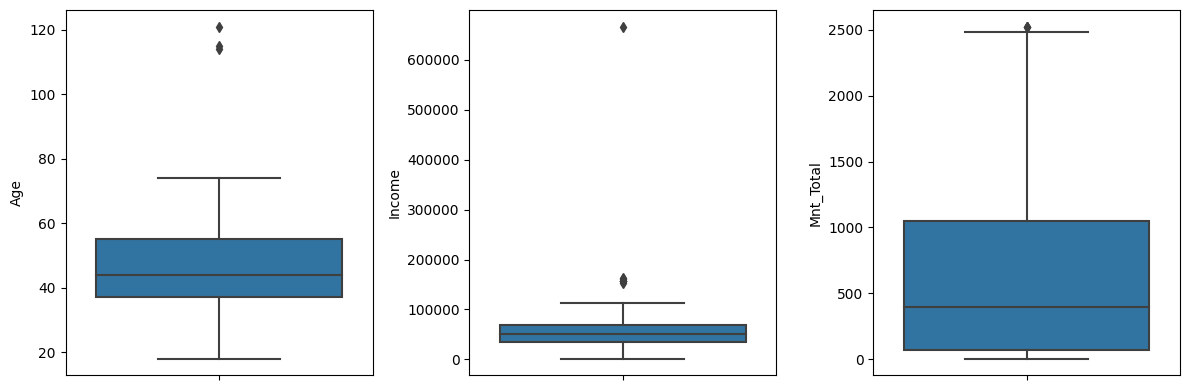

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

search_outliers = ['Age', 'Income', 'Mnt_Total']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=base, ax=axs[i])

%matplotlib inline
plt.show()

# Verificando Outliers
- Crei um arquivo chamado "Auxiliar_functions" para procurar outliers nas colunas. 
- Com isso vou verificando como pode ser a melhor forma de tratar os dados

# Criando um arquivo a parte auxiliar chamado "Auxiliar Functions"
- Criando a função para procurar Outliers

In [36]:
#Tratando a coluna Age
import Auxiliar_functions as af
af.inspect_outliers(base,search_outliers[0])

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD        Partner  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  Years_Since_Enrolled  Age  Age_Group  \
192  2013-09-26       99        15  ...                     0  114        61+   
239  2014-05-17       23         8  ...                     0  121        61+   
339  2013-09-26       36       755  ...                     0  115        61+   

     Mnt_Total  Mnt_Reg  Children  Has_Children  Accepted_Cmp_Total  \
192         65       40         1             1                   0   
239         22       20         1             1                   0   
339       1853     1629         0             0                   1   

     Has_Accepted_Cmp  Num_Total_Purchases  
192                 0                    5  
239                 0                    3  
339                 1                   14  

[3 rows x 40 columns]

In [37]:
#Por serem poucas linhas e idades muito acima do normal, irei excluir
base= base.drop(af.inspect_outliers(base,search_outliers[0]).index)
base

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Years_Since_Enrolled  Age  \
0            0  2012-09-04       58       635  ...                     1   57   
1            1  2014-03-08       38        11  ...                     0   60   
2            0  2013-08-21       26       426  ...                     0   49   
3            0  2014-02-10       26        11  ...                     0   30   
4            0  2014-01-19       94       173  ...                     0   33   
...        ...         ...      ...       ...  ...                   ...  ...   
2235         1  2013-06-13       46       709  ...                     1   47   
2236         1  2014-06-10       56       406  ...                     0   68   
2237         0  2014-01-25       91       908  ...                     0   33   
2238         1  2014-01-24        8       428  ...                     0   58   
2239         1  2012-10-15       40        84  ...                     1   60   

      Age_Group  Mnt_Total  Mnt_Reg  Children  Has_Children  \
0         46-60       1617     1529         0             0   
1         46-60         27       21         2             1   
2         46-60        776      734         0             0   
3         18-30         53       48         1             1   
4         31-45        422      407         1             1   
...         ...        ...      ...       ...           ...   
2235      46-60       1341     1094         1             1   
2236        61+        444      436         3             1   
2237      31-45       1241     1217         0             0   
2238      46-60        843      782         1             1   
2239      46-60        172      151         2             1   

      Accepted_Cmp_Total  Has_Accepted_Cmp  Num_Total_Purchases  
0                      0                 0                   22  
1                      0                 0                    4  
2                      0                 0                   20  
3                      0                 0                    6  
4                      0                 0                   14  
...                  ...               ...                  ...  
2235                   0                 0                   16  
2236                   1                 1                   15  
2237                   1                 1                   18  
2238                   0                 0                   21  
2239                   0                 0                    8  

[2213 rows x 40 columns]

In [38]:
#Tratando a coluna Income
af.inspect_outliers(base,search_outliers[1])

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Partner  157243.0        0   
617    1503        1976         PhD        Partner  162397.0        1   
655    5555        1975  Graduation         Single  153924.0        0   
687    1501        1982         PhD        Partner  160803.0        0   
1300   5336        1971      Master        Partner  157733.0        1   
1653   4931        1977  Graduation        Partner  157146.0        0   
2132  11181        1949         PhD        Partner  156924.0        0   
2233   9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Years_Since_Enrolled  Age  \
164          1  2014-03-01       98        20  ...                     0   41   
617          1  2013-06-03       31        85  ...                     1   38   
655          0  2014-02-07       81         1  ...                     0   39   
687          0  2012-08-04       21        55  ...                     1   32   
1300         0  2013-06-04       37        39  ...                     1   43   
1653         0  2013-04-29       13         1  ...                     1   37   
2132         0  2013-08-29       85         2  ...                     0   65   
2233         0  2013-06-02       23         9  ...                     1   37   

      Age_Group  Mnt_Total  Mnt_Reg  Children  Has_Children  \
164       31-45       1608     1607         1             1   
617       31-45        107      105         2             1   
655       31-45          6        5         0             0   
687       31-45       1717     1713         0             0   
1300      31-45         59       51         1             1   
1653      31-45       1730     1729         0             0   
2132        61+          8        7         0             0   
2233      31-45         62       50         1             1   

      Accepted_Cmp_Total  Has_Accepted_Cmp  Num_Total_Purchases  
164                    0                 0                   22  
617                    0                 0                    1  
655                    0                 0                    0  
687                    0                 0                   29  
1300                   0                 0                    2  
1653                   0                 0                   28  
2132                   0                 0                    0  
2233                   0                 0                    7  

[8 rows x 40 columns]

In [39]:
#Por serem poucas linhas e renda muito acima do normal, irei excluir
base= base.drop(af.inspect_outliers(base,search_outliers[1]).index)
base

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation        Partner  71613.0        0   
3      6182        1984  Graduation        Partner  26646.0        1   
4      5324        1981         PhD        Partner  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Partner  61223.0        0   
2236   4001        1946         PhD        Partner  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master        Partner  69245.0        0   
2239   9405        1954         PhD        Partner  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Years_Since_Enrolled  Age  \
0            0  2012-09-04       58       635  ...                     1   57   
1            1  2014-03-08       38        11  ...                     0   60   
2            0  2013-08-21       26       426  ...                     0   49   
3            0  2014-02-10       26        11  ...                     0   30   
4            0  2014-01-19       94       173  ...                     0   33   
...        ...         ...      ...       ...  ...                   ...  ...   
2235         1  2013-06-13       46       709  ...                     1   47   
2236         1  2014-06-10       56       406  ...                     0   68   
2237         0  2014-01-25       91       908  ...                     0   33   
2238         1  2014-01-24        8       428  ...                     0   58   
2239         1  2012-10-15       40        84  ...                     1   60   

      Age_Group  Mnt_Total  Mnt_Reg  Children  Has_Children  \
0         46-60       1617     1529         0             0   
1         46-60         27       21         2             1   
2         46-60        776      734         0             0   
3         18-30         53       48         1             1   
4         31-45        422      407         1             1   
...         ...        ...      ...       ...           ...   
2235      46-60       1341     1094         1             1   
2236        61+        444      436         3             1   
2237      31-45       1241     1217         0             0   
2238      46-60        843      782         1             1   
2239      46-60        172      151         2             1   

      Accepted_Cmp_Total  Has_Accepted_Cmp  Num_Total_Purchases  
0                      0                 0                   22  
1                      0                 0                    4  
2                      0                 0                   20  
3                      0                 0                    6  
4                      0                 0                   14  
...                  ...               ...                  ...  
2235                   0                 0                   16  
2236                   1                 1                   15  
2237                   1                 1                   18  
2238                   0                 0                   21  
2239                   0                 0                    8  

[2205 rows x 40 columns]

In [40]:
#Tratando a coluna Mnt_Total
af.inspect_outliers(base,search_outliers[2])

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1179  5735        1991      Master         Single  90638.0        0         0   
1492  1763        1988  Graduation        Partner  87679.0        0         0   
1572  5350        1991      Master         Single  90638.0        0         0   

     Dt_Customer  Recency  MntWines  ...  Years_Since_Enrolled  Age  \
1179  2014-02-13       29      1156  ...                     0   23   
1492  2013-07-27       62      1259  ...                     0   26   
1572  2014-02-13       29      1156  ...                     0   23   

      Age_Group  Mnt_Total  Mnt_Reg  Children  Has_Children  \
1179      18-30       2525     2429         0             0   
1492      18-30       2524     2491         0             0   
1572      18-30       2525     2429         0             0   

      Accepted_Cmp_Total  Has_Accepted_Cmp  Num_Total_Purchases  
1179                   1                 1                   17  
1492                   3                 1                   28  
1572                   1                 1                   17  

[3 rows x 40 columns]

- No caso de 'Mnt_Total" ao meu ver, são outliers apenas matematicos. Na minha visão não há necessidade de ser feito a exclusão dos valores

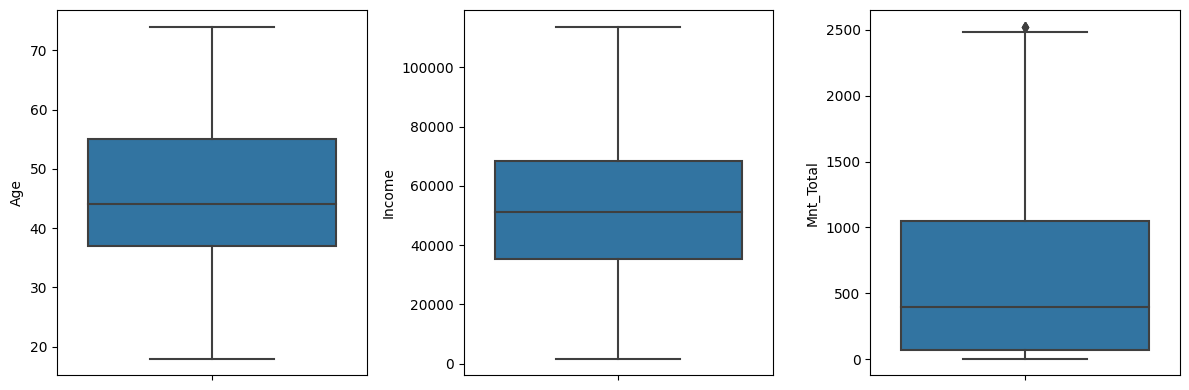

In [41]:
search_outliers = ['Age', 'Income', 'Mnt_Total']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=base, ax=axs[i])

plt.show()

# Exclusão de colunas
- Começando a excluir colunas que são podem ser inuteis para o modelo ou estão repetidas com a criação das colunas que fizemos

In [42]:
#Excluindo as colunas repetidas ou que não trazem informações
base=base.drop(
    [
        'ID',
        'Year_Birth',
        'Dt_Customer',
        'Z_CostContact',
        'Z_Revenue'
    ]
,axis=1)
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Education             2205 non-null   object  
 1   Marital_Status        2205 non-null   object  
 2   Income                2205 non-null   float64 
 3   Kidhome               2205 non-null   int64   
 4   Teenhome              2205 non-null   int64   
 5   Recency               2205 non-null   int64   
 6   MntWines              2205 non-null   int64   
 7   MntFruits             2205 non-null   int64   
 8   MntMeatProducts       2205 non-null   int64   
 9   MntFishProducts       2205 non-null   int64   
 10  MntSweetProducts      2205 non-null   int64   
 11  MntGoldProds          2205 non-null   int64   
 12  NumDealsPurchases     2205 non-null   int64   
 13  NumWebPurchases       2205 non-null   int64   
 14  NumCatalogPurchases   2205 non-null   int64   
 15  NumStoreP

In [43]:
#Salvando a base
base.to_csv('../dados/custumer_nf_drop.csv',index=False)

# Descrição
- Após as mudanças, verificar como está a base

In [44]:
#Descrição da parte numerica
with pd.option_context('display.float_format', '{:.2f}'.format,
                      'display.max_columns',None):
    display(base.describe())

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2205.00  2205.00   2205.00  2205.00   2205.00    2205.00   
mean   51622.09     0.44      0.51    49.01    306.16      26.40   
std    20713.06     0.54      0.54    28.93    337.49      39.78   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35196.00     0.00      0.00    24.00     24.00       2.00   
50%    51287.00     0.00      0.00    49.00    178.00       8.00   
75%    68281.00     1.00      1.00    74.00    507.00      33.00   
max   113734.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2205.00          2205.00           2205.00       2205.00   
mean            165.31            37.76             27.13         44.06   
std             217.78            54.82             41.13         51.74   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         25.00   
75%             232.00            50.00             34.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2205.00          2205.00              2205.00   
mean                2.32             4.10                 2.65   
std                 1.89             2.74                 2.80   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2205.00            2205.00       2205.00       2205.00   
mean                5.82               5.34          0.07          0.07   
std                 3.24               2.41          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count       2205.00       2205.00       2205.00   2205.00   2205.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       Days_Since_Enrolled  Years_Since_Enrolled     Age  Mnt_Total  Mnt_Reg  \
count              2205.00               2205.00 2205.00    2205.00  2205.00   
mean                353.72                  0.48   45.10     606.82   562.76   
std                 202.56                  0.50   11.71     601.68   575.94   
min                   0.00                  0.00   18.00       5.00     4.00   
25%                 180.00                  0.00   37.00      69.00    56.00   
50%                 356.00                  0.00   44.00     397.00   343.00   
75%                 529.00                  1.00   55.00    1047.00   964.00   
max                 699.00                  1.00   74.00    2525.00  2491.00   

       Children  Has_Children  Accepted_Cmp_Total  Has_Accepted_Cmp  \
count   2205.00  

In [45]:
#Descrição da parte em texto
base.describe(exclude='number')

Education Marital_Status Age_Group
count         2205           2205      2205
unique           5              2         4
top     Graduation        Partner     31-45
freq          1113           1422       958

- Criando função no arquivo 'Auxliar Functions' chamada Pairplot 

In [46]:
#Escolhendo algumas colunas para fazer análises
Col_analysis =[
    'Income',
    'Recency',
    'Days_Since_Enrolled',
    'Age',
    'Mnt_Total'
]

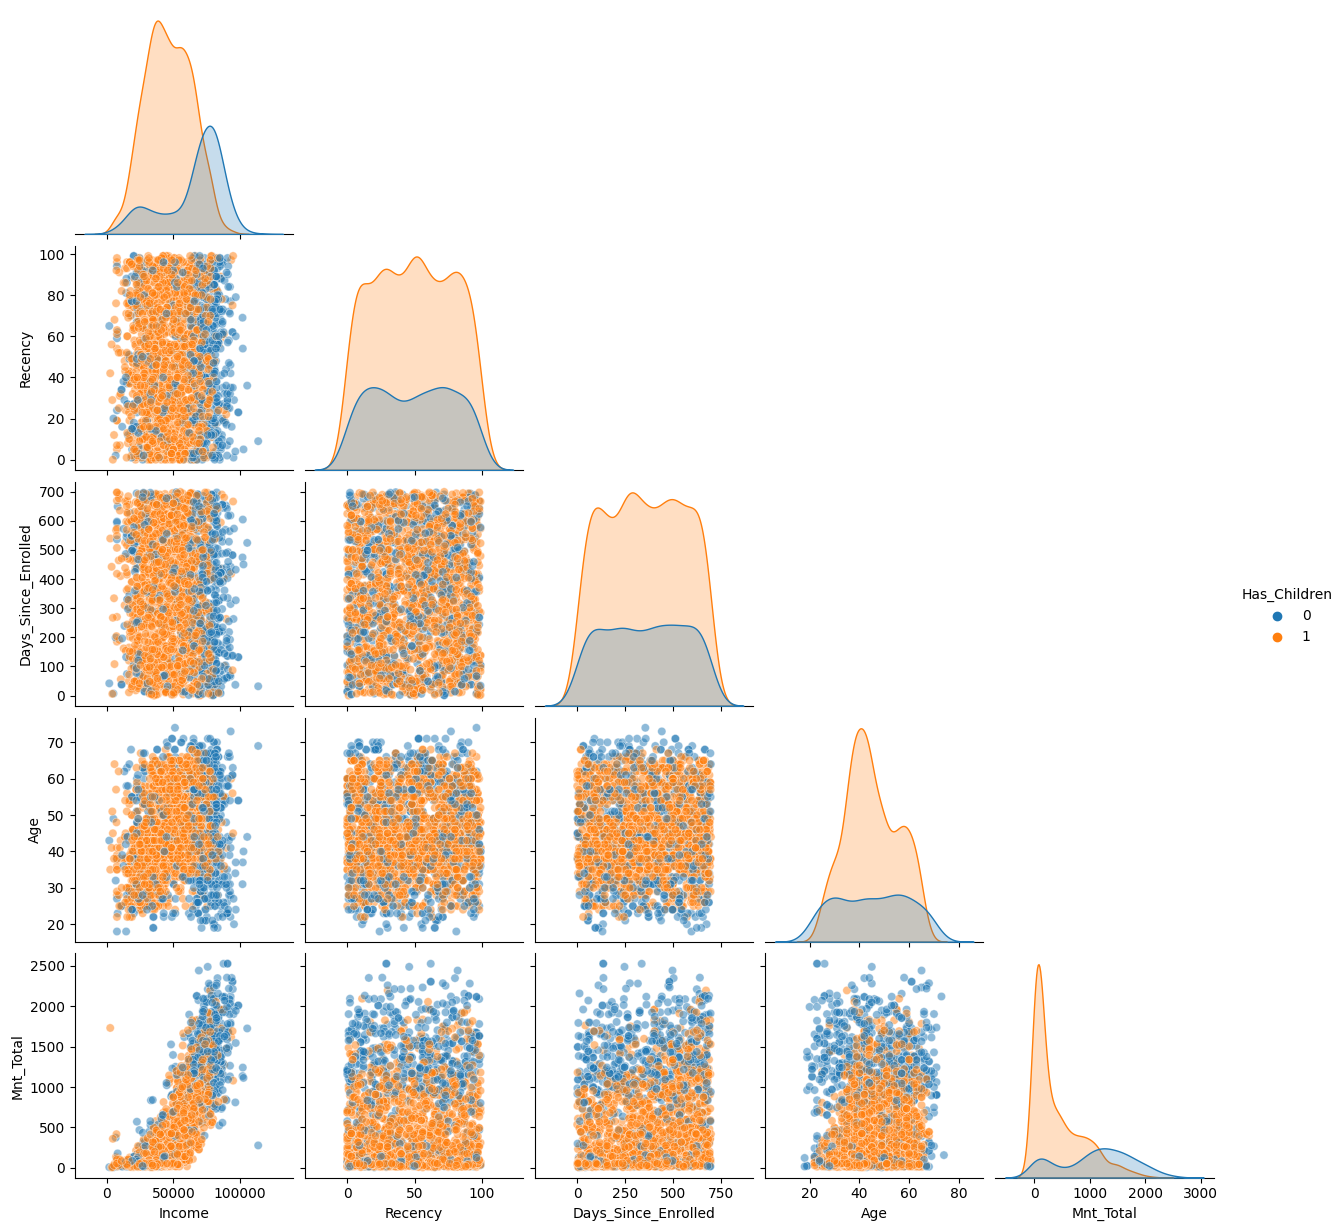

In [47]:
#Plotando as colunas e escolhendo o Hue com a coluna 'Has_Children'
af.pairplot(base,Col_analysis,hue_column='Has_Children')

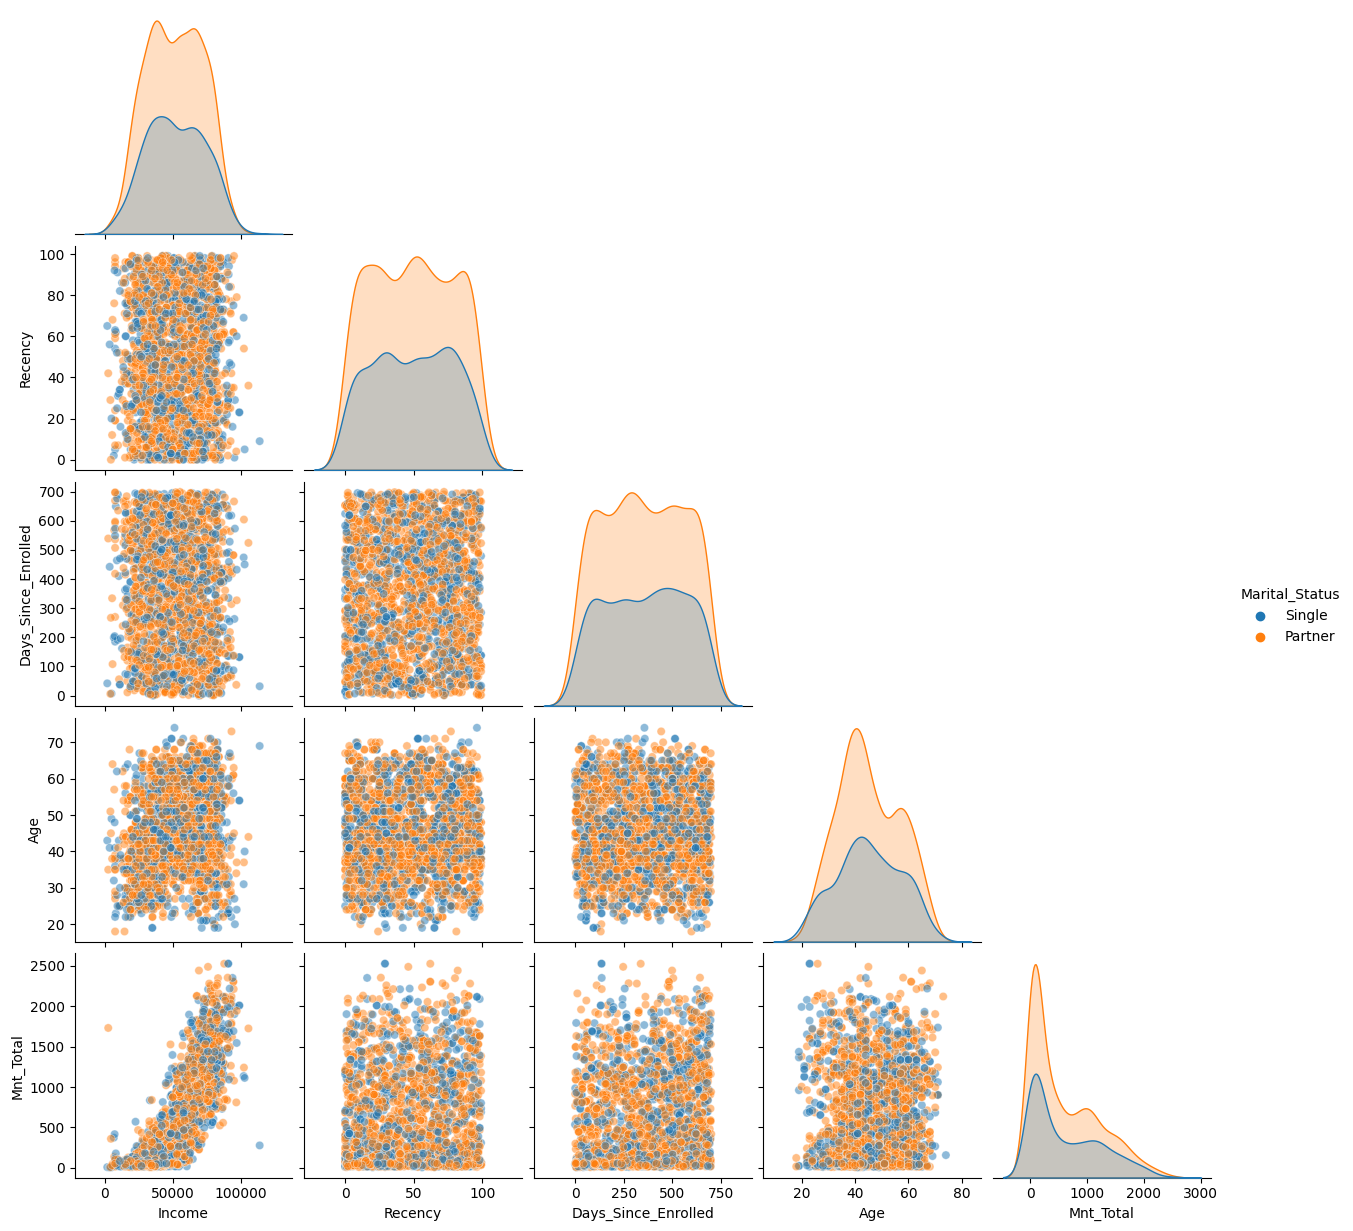

In [48]:
#Plotando as colunas e escolhendo o Hue com a coluna 'Marital_Status'
af.pairplot(base,Col_analysis,hue_column='Marital_Status')

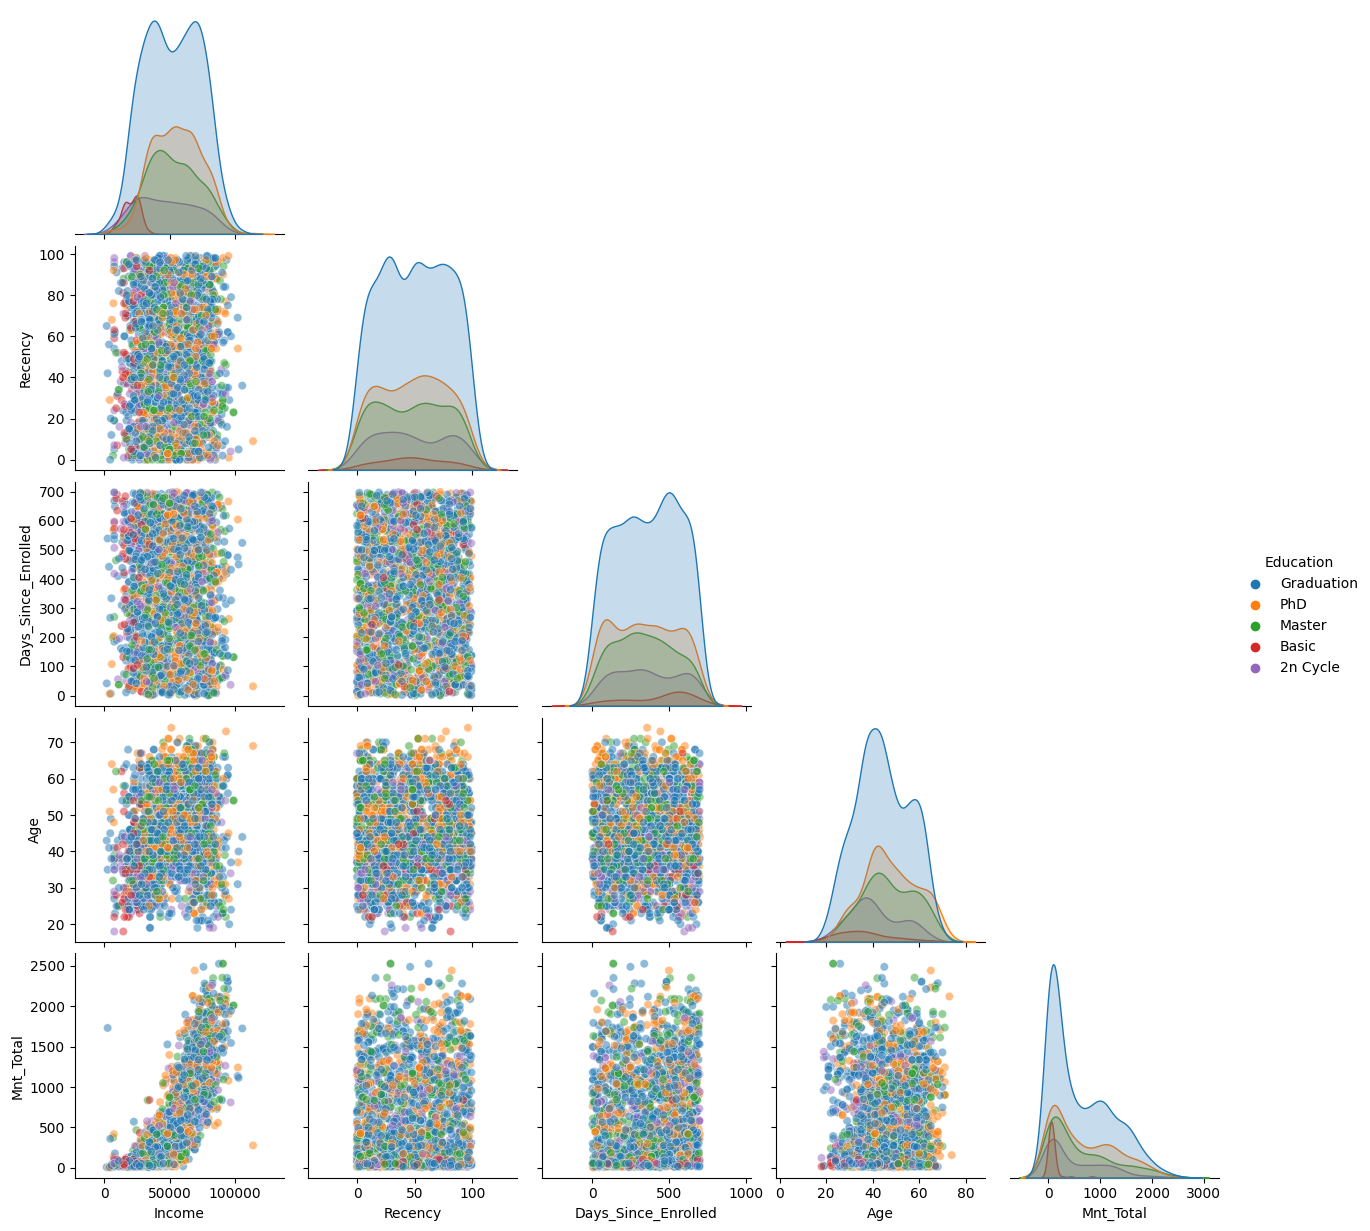

In [49]:
#Plotando as colunas e escolhendo o Hue com a coluna 'Education'
af.pairplot(base,Col_analysis,hue_column='Education')

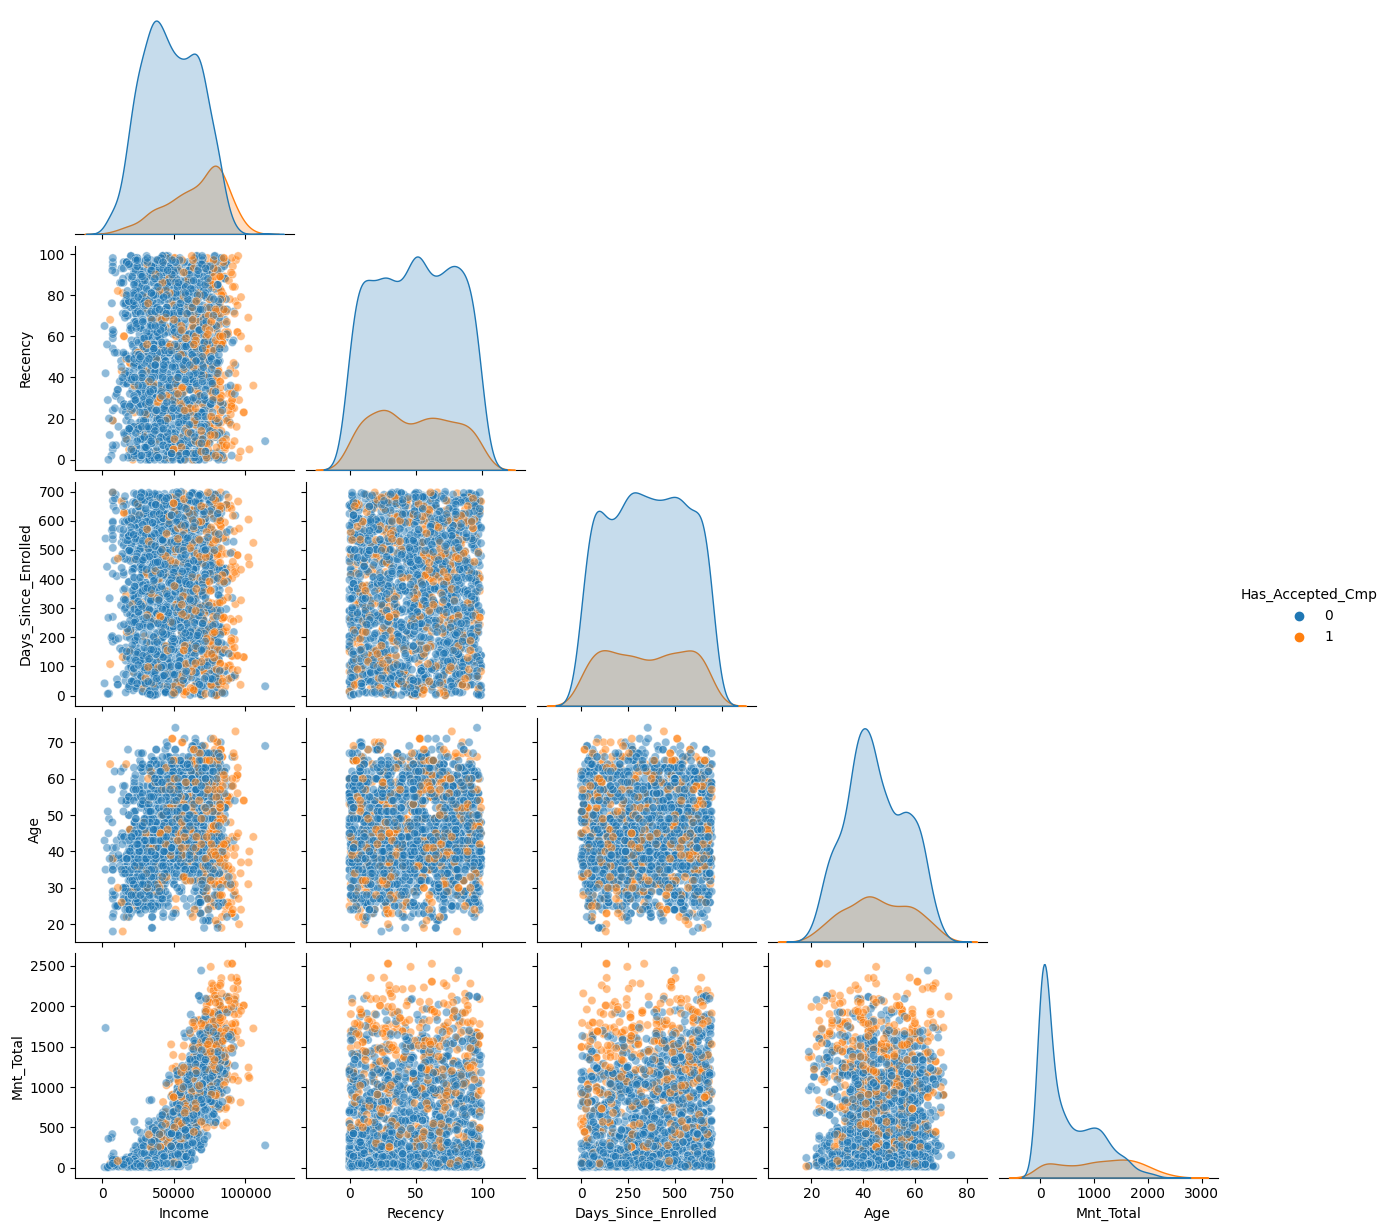

In [50]:
#Plotando as colunas e escolhendo o Hue com a coluna 'Has_Accepted_Cmp'
af.pairplot(base,Col_analysis,hue_column='Has_Accepted_Cmp')

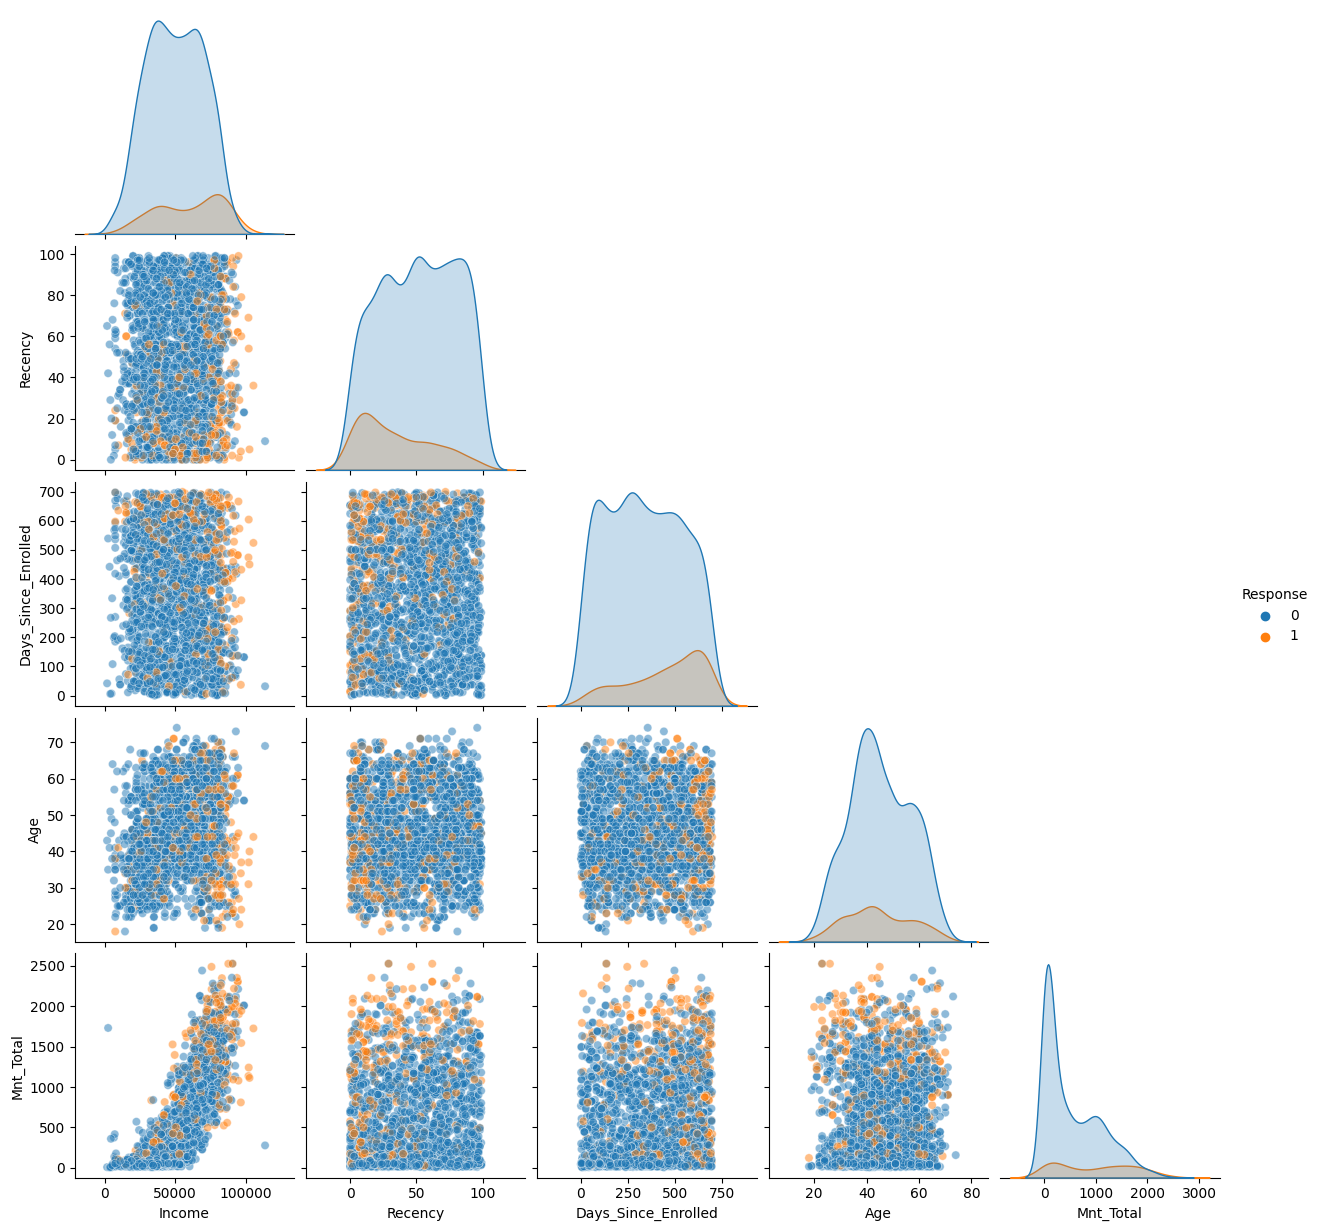

In [51]:
#Plotando as colunas e escolhendo o Hue com a coluna 'Response'
af.pairplot(base,Col_analysis,hue_column='Response')

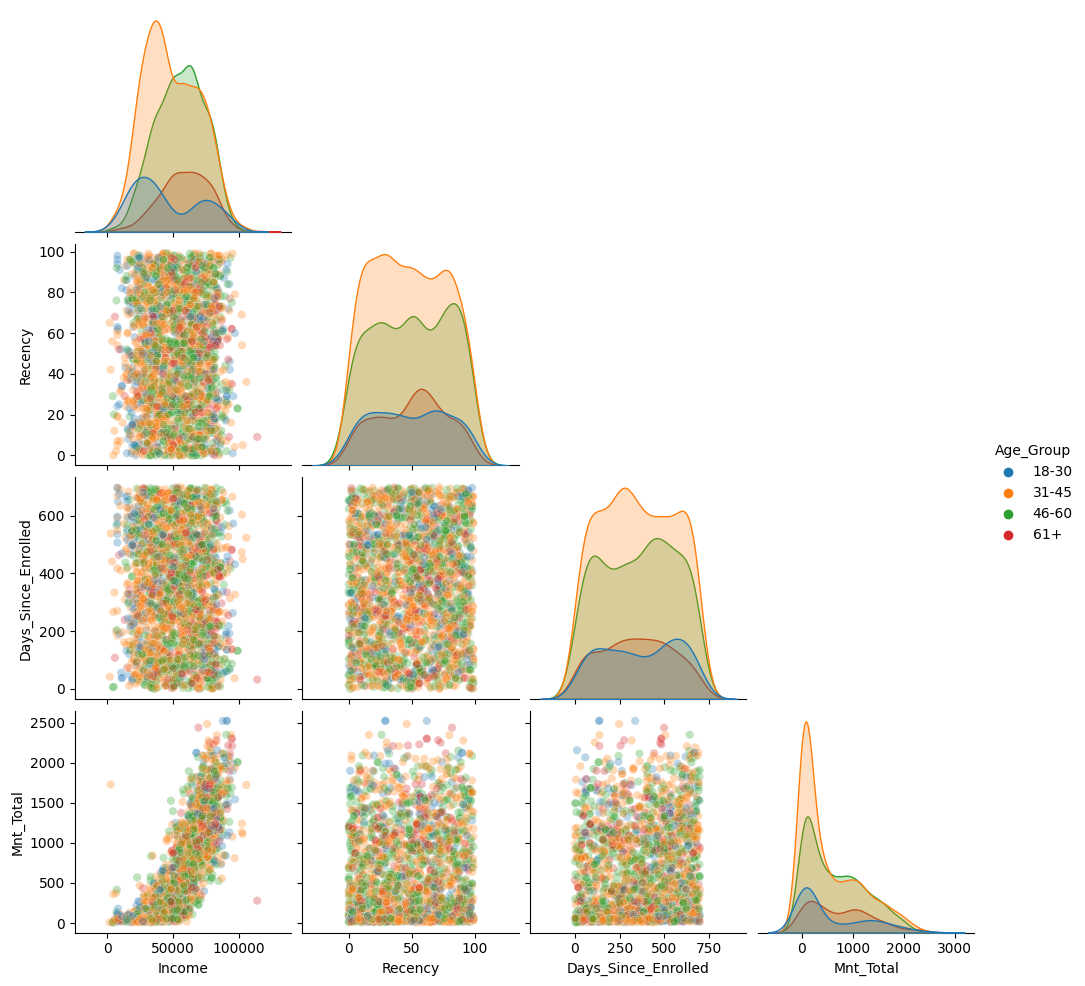

In [52]:
#Plotando as colunas e escolhendo o Hue com a coluna 'Age_Group'
Col_analysis_without_Age =[
    'Income',
    'Recency',
    'Days_Since_Enrolled',
    'Mnt_Total']
af.pairplot(base,Col_analysis_without_Age,hue_column='Age_Group',alpha=0.3)

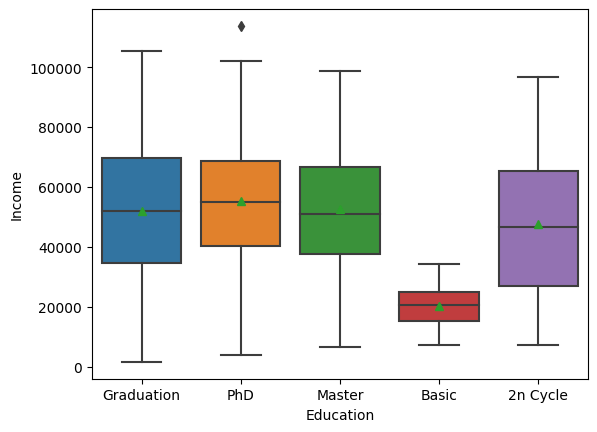

In [53]:
#Fazendo em Boxplot para vermos 'Education' e 'Income'
sns.boxplot(x='Education',y='Income',data=base, showmeans=True);

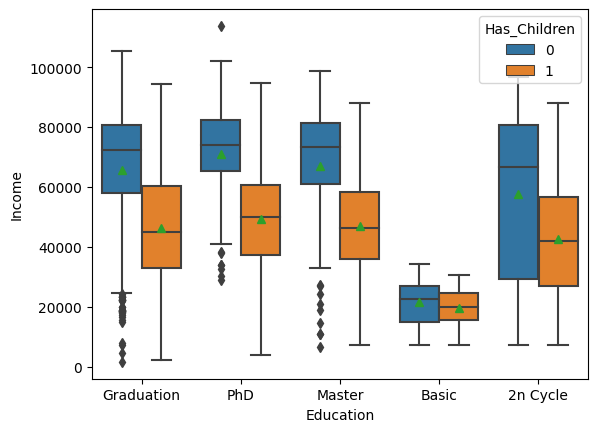

In [54]:
#Fazendo em Boxplot para vermos 'Education' e 'Income' utilizando o parametro 'Has_Children' destacando para a análise
sns.boxplot(x='Education',y='Income',data=base, showmeans=True, hue='Has_Children');

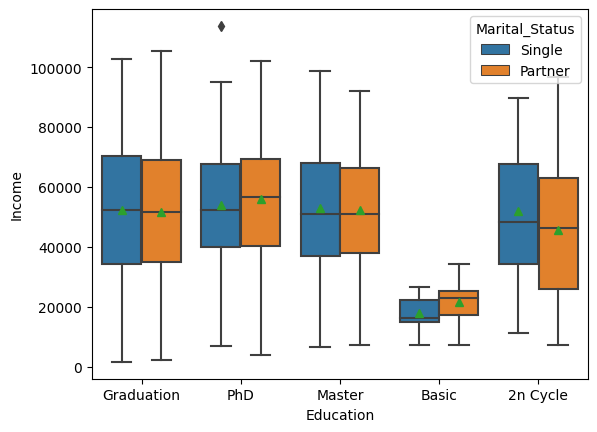

In [55]:
#Fazendo em Boxplot para vermos 'Education' e 'Income' utilizando o parametro 'Marital_Status'destacando para a análise
sns.boxplot(x='Education',y='Income',data=base, showmeans=True, hue='Marital_Status');

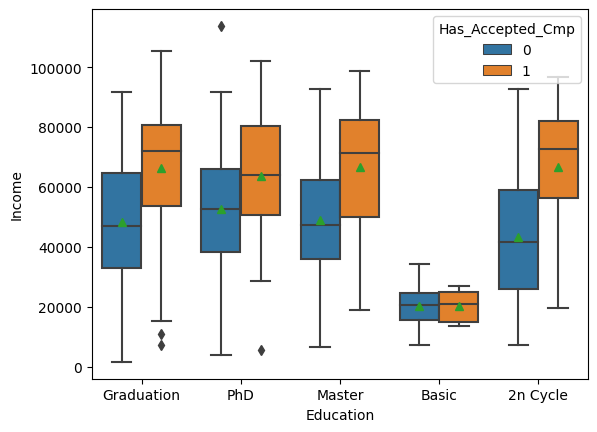

In [56]:
#Fazendo em Boxplot para vermos 'Education' e 'Income' utilizando o parametro 'Has_Accepted_Cmp'destacando para a análise
sns.boxplot(x='Education',y='Income',data=base, showmeans=True, hue='Has_Accepted_Cmp');

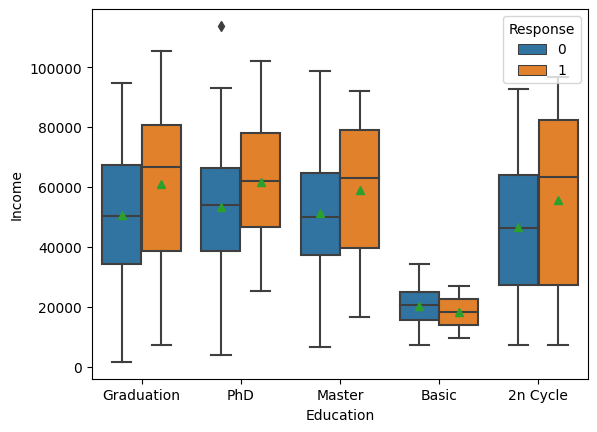

In [57]:
#Fazendo em Boxplot para vermos 'Education' e 'Income' utilizando o parametro 'Response'destacando para a análise
sns.boxplot(x='Education',y='Income',data=base, showmeans=True, hue='Response');

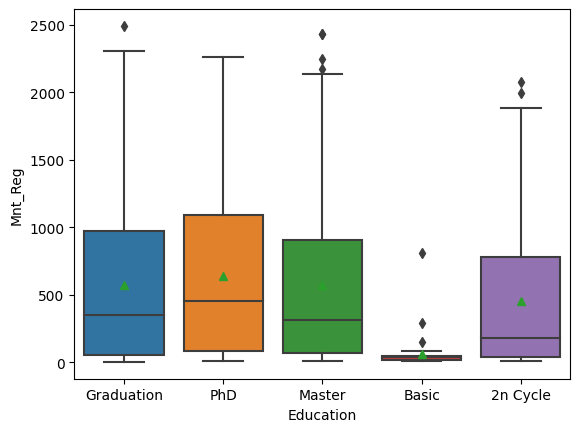

In [58]:
#Fazendo em Boxplot para vermos 'Education' e 'Mnt_Reg' utilizando o parametro 'Marital_Status'destacando para a análise
sns.boxplot(x='Education',y='Mnt_Reg',data=base, showmeans=True);

In [59]:
# Fazer estudo de correlação, retirando variáveis de texto
base_dummies = pd.get_dummies(base, dtype=int)
base_dummies.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Partner  Marital_Status_Single  Age_Group_18-30  \
0                       0                      1                0   
1                       0                      1                0   
2                       1                      0                0   
3                       1                      0                1   
4                       1                      0                0   

   Age_Group_31-45  Age_Group_46-60  Age_Group_61+  
0                0                1              0  
1                0                1              0  
2                0                1              0  
3                0                0              0  
4                1                0              0  

[5 rows x 43 columns]

In [60]:
#Verificando as novas colunas criadas
base_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2205 non-null   float64
 1   Kidhome                 2205 non-null   int64  
 2   Teenhome                2205 non-null   int64  
 3   Recency                 2205 non-null   int64  
 4   MntWines                2205 non-null   int64  
 5   MntFruits               2205 non-null   int64  
 6   MntMeatProducts         2205 non-null   int64  
 7   MntFishProducts         2205 non-null   int64  
 8   MntSweetProducts        2205 non-null   int64  
 9   MntGoldProds            2205 non-null   int64  
 10  NumDealsPurchases       2205 non-null   int64  
 11  NumWebPurchases         2205 non-null   int64  
 12  NumCatalogPurchases     2205 non-null   int64  
 13  NumStorePurchases       2205 non-null   int64  
 14  NumWebVisitsMonth       2205 non-null   int64

In [61]:
#Exportando a base para caso seja necessário futuramente.
base_dummies.to_csv('../dados/custumer_nf_drop_dummies.csv',index=False)

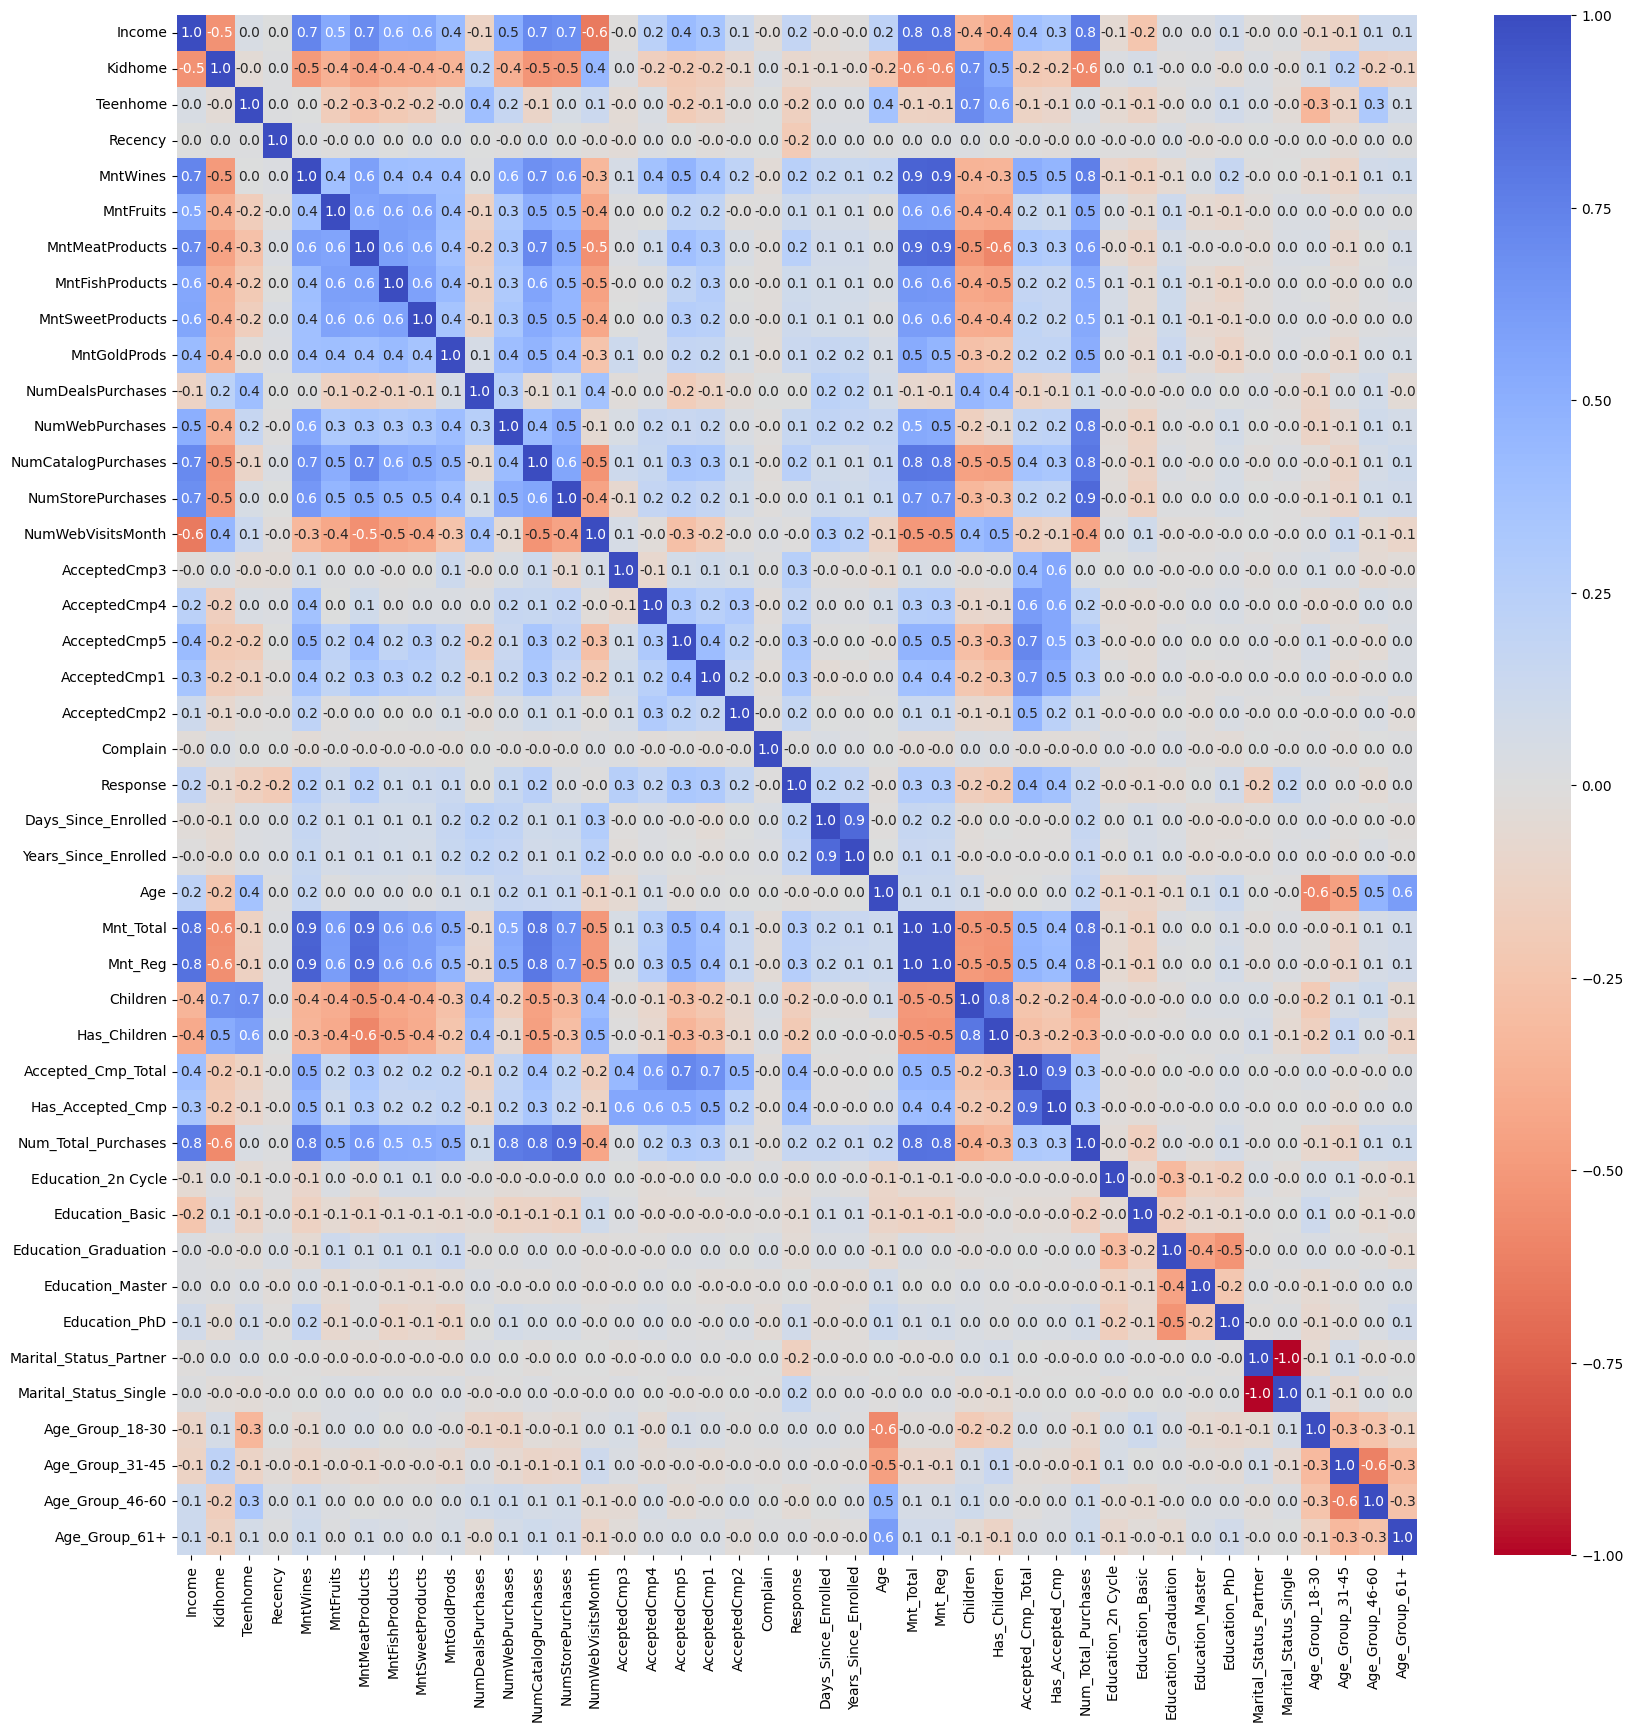

In [62]:
#Fazendo o grafico de Correlação
base_dummies_corr = base_dummies.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(base_dummies_corr,annot=True, ax=ax,fmt='.1f',cmap='coolwarm_r');

In [63]:
#Tentando melhorar a visualização dos dados - Income
base_dummies_corr_unstack = pd.DataFrame(base_dummies_corr.unstack())
base_dummies_corr_unstack= base_dummies_corr_unstack.rename(columns={0:'corr'})
base_dummies_corr_unstack.loc['Income'].sort_values(by='corr')

corr
NumWebVisitsMonth      -0.648306
Kidhome                -0.531699
Has_Children           -0.410545
Children               -0.350313
Education_Basic        -0.239604
NumDealsPurchases      -0.132427
Age_Group_31-45        -0.126099
Age_Group_18-30        -0.112011
Education_2n Cycle     -0.060621
Complain               -0.027488
Days_Since_Enrolled    -0.024892
Marital_Status_Partner -0.012405
AcceptedCmp3           -0.011181
Years_Since_Enrolled   -0.002489
Recency                 0.006716
Marital_Status_Single   0.012405
Education_Graduation    0.017644
Education_Master        0.021633
Teenhome                0.042483
Education_PhD           0.091176
AcceptedCmp2            0.110210
Age_Group_46-60         0.123550
Age_Group_61+           0.124547
Response                0.174902
Age                     0.212625
AcceptedCmp4            0.233267
Has_Accepted_Cmp        0.336105
AcceptedCmp1            0.345242
Accepted_Cmp_Total      0.388247
AcceptedCmp5            0.416386
MntGoldProds            0.417653
NumWebPurchases         0.503184
MntFruits               0.537920
MntFishProducts         0.551758
MntSweetProducts        0.555601
NumStorePurchases       0.687206
MntMeatProducts         0.702500
NumCatalogPurchases     0.710057
MntWines                0.730495
Num_Total_Purchases     0.778849
Mnt_Reg                 0.823066
Mnt_Total               0.823770
Income                  1.000000

In [64]:
#Melhorando a visualização dos dados - Age
base_dummies_corr_unstack.loc['Age'].sort_values(by='corr')

corr
Age_Group_18-30        -0.580462
Age_Group_31-45        -0.464348
Kidhome                -0.238083
NumWebVisitsMonth      -0.122713
Education_Basic        -0.115872
Education_2n Cycle     -0.104364
Education_Graduation   -0.061579
AcceptedCmp3           -0.061405
Response               -0.021305
AcceptedCmp5           -0.019275
Days_Since_Enrolled    -0.013462
Has_Children           -0.012013
Marital_Status_Single  -0.003800
Accepted_Cmp_Total      0.001529
Marital_Status_Partner  0.003800
Years_Since_Enrolled    0.003869
Complain                0.004531
AcceptedCmp2            0.007737
AcceptedCmp1            0.011747
MntFruits               0.013149
Recency                 0.014228
MntSweetProducts        0.021075
Has_Accepted_Cmp        0.030203
MntFishProducts         0.040855
MntMeatProducts         0.041540
MntGoldProds            0.059295
AcceptedCmp4            0.069903
NumDealsPurchases       0.072005
Education_Master        0.074754
Children                0.093007
Mnt_Reg                 0.118370
Mnt_Total               0.118404
Education_PhD           0.123429
NumStorePurchases       0.138614
NumCatalogPurchases     0.140724
NumWebPurchases         0.161839
MntWines                0.164438
Num_Total_Purchases     0.179130
Income                  0.212625
Teenhome                0.362919
Age_Group_46-60         0.469812
Age_Group_61+           0.603412
Age                     1.000000

In [65]:
#Melhorando a visualização dos dados - Recency
base_dummies_corr_unstack.loc['Recency'].sort_values(by='corr')

corr
Response               -0.200413
Age_Group_31-45        -0.032791
AcceptedCmp3           -0.032327
Education_Master       -0.025563
AcceptedCmp1           -0.021097
NumWebVisitsMonth      -0.017906
Has_Accepted_Cmp       -0.016200
Accepted_Cmp_Total     -0.013344
Education_PhD          -0.009234
Education_2n Cycle     -0.006789
NumWebPurchases        -0.005104
MntFruits              -0.004909
Education_Basic        -0.003093
AcceptedCmp2           -0.001390
Marital_Status_Single  -0.000364
AcceptedCmp5            0.000334
Marital_Status_Partner  0.000364
NumStorePurchases       0.000462
NumDealsPurchases       0.000479
MntFishProducts         0.001177
Age_Group_18-30         0.001254
Has_Children            0.002109
Complain                0.005758
Income                  0.006716
Age_Group_61+           0.009705
Num_Total_Purchases     0.009858
Kidhome                 0.011829
Teenhome                0.013881
Age                     0.014228
MntWines                0.016470
AcceptedCmp4            0.017658
MntGoldProds            0.018558
Children                0.018566
Mnt_Reg                 0.021132
Mnt_Total               0.021824
MntSweetProducts        0.025535
MntMeatProducts         0.026138
Age_Group_46-60         0.027028
Days_Since_Enrolled     0.028338
NumCatalogPurchases     0.029750
Years_Since_Enrolled    0.030129
Education_Graduation    0.031419
Recency                 1.000000

In [66]:
#Melhorando a visualização dos dados - Mnt_Total
base_dummies_corr_unstack.loc['Mnt_Total'].sort_values(by='corr')

corr
Kidhome                -0.558234
Has_Children           -0.523234
NumWebVisitsMonth      -0.501937
Children               -0.500883
Teenhome               -0.138565
Education_Basic        -0.138291
Age_Group_31-45        -0.099767
NumDealsPurchases      -0.078956
Education_2n Cycle     -0.056043
Complain               -0.034167
Marital_Status_Partner -0.022514
Age_Group_18-30        -0.020575
Education_Master        0.003296
Recency                 0.021824
Marital_Status_Single   0.022514
Education_Graduation    0.025049
AcceptedCmp3            0.053411
Education_PhD           0.057482
Age_Group_46-60         0.058827
Age_Group_61+           0.087625
Age                     0.118404
AcceptedCmp2            0.136832
Years_Since_Enrolled    0.146639
Days_Since_Enrolled     0.157917
AcceptedCmp4            0.250102
Response                0.265620
AcceptedCmp1            0.382727
Has_Accepted_Cmp        0.413036
Accepted_Cmp_Total      0.458284
AcceptedCmp5            0.470360
MntGoldProds            0.529845
NumWebPurchases         0.533702
MntSweetProducts        0.609244
MntFruits               0.614464
MntFishProducts         0.644453
NumStorePurchases       0.682306
NumCatalogPurchases     0.797844
Num_Total_Purchases     0.822488
Income                  0.823770
MntMeatProducts         0.856838
MntWines                0.897262
Mnt_Reg                 0.997094
Mnt_Total               1.000000

In [67]:
#Melhorando a visualização dos dados - Response
base_dummies_corr_unstack.loc['Response'].sort_values(by='corr')

corr
Has_Children           -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.150202
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
Age_Group_46-60        -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
Age_Group_61+           0.008916
Age_Group_31-45         0.011045
Age_Group_18-30         0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
MntGoldProds            0.140210
NumWebPurchases         0.149699
Marital_Status_Single   0.150202
Num_Total_Purchases     0.163609
AcceptedCmp2            0.169128
Years_Since_Enrolled    0.174524
Income                  0.174902
AcceptedCmp4            0.179727
Days_Since_Enrolled     0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
Mnt_Reg                 0.264895
Mnt_Total               0.265620
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
Has_Accepted_Cmp        0.367892
Accepted_Cmp_Total      0.426961
Response                1.000000

In [68]:
#Verificar a variavel Response sem a corr com a propria response.
Response_corr=base_dummies_corr_unstack.loc['Response'].sort_values(by='corr')[:-1]
Response_corr

corr
Has_Children           -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.150202
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
Age_Group_46-60        -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
Age_Group_61+           0.008916
Age_Group_31-45         0.011045
Age_Group_18-30         0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
MntGoldProds            0.140210
NumWebPurchases         0.149699
Marital_Status_Single   0.150202
Num_Total_Purchases     0.163609
AcceptedCmp2            0.169128
Years_Since_Enrolled    0.174524
Income                  0.174902
AcceptedCmp4            0.179727
Days_Since_Enrolled     0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
Mnt_Reg                 0.264895
Mnt_Total               0.265620
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
Has_Accepted_Cmp        0.367892
Accepted_Cmp_Total      0.426961

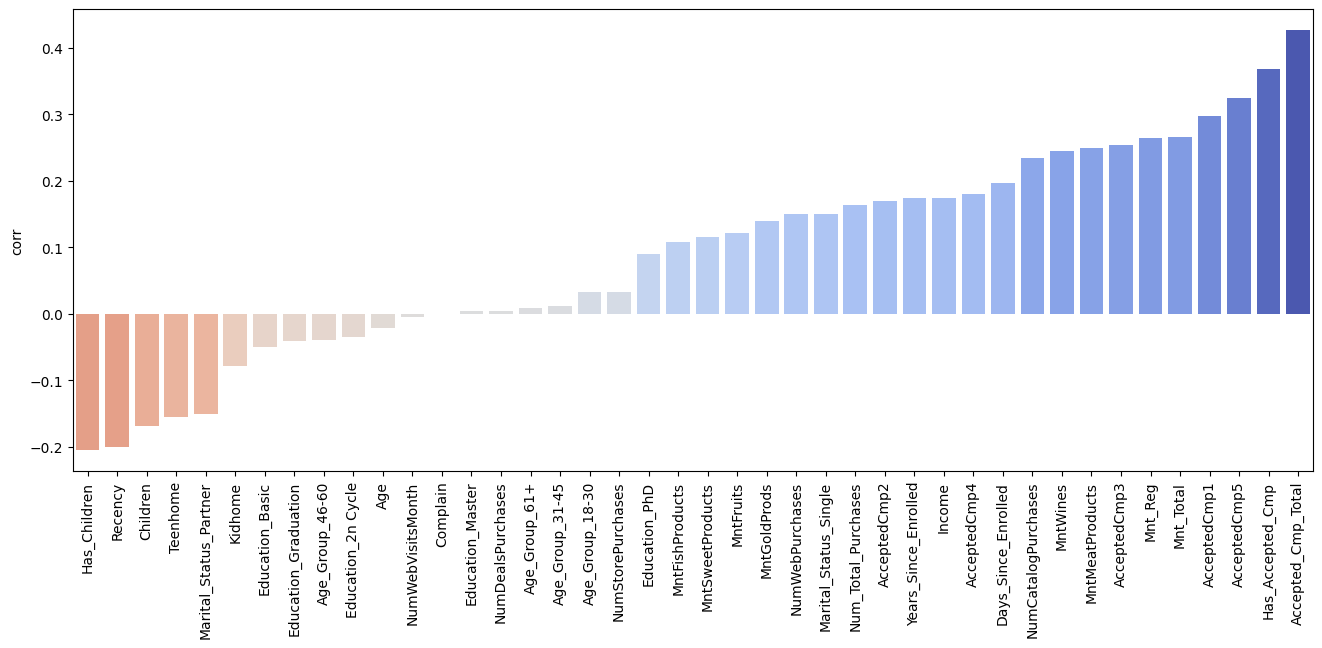

In [85]:
#Mostrar graficamente a correlação
from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

cmap = "coolwarm_r"
cnorm = CenteredNorm(vcenter=0, halfrange=0.4)
smap = ScalarMappable(norm=cnorm, cmap=cmap)

listed_colors = ListedColormap([smap.to_rgba(x) for x in Response_corr["corr"]]).colors
fig, ax = plt.subplots(figsize=(16, 6))

b = sns.barplot(x=Response_corr.index, y=Response_corr["corr"], palette=listed_colors)
b.tick_params(axis="x", rotation=90)
plt.show()